### 1) Importar las librerias pandas, numpy y matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')


### 2) Crear un dataframe de nombre DF desde los datos que se pueden tomar desde la siguiente URL
https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv  
Tenga en cuenta que es necesario utilizar un separador especial (punto y coma) ya que el archivo no esta separado por comas como suele ser siempre

In [ ]:
#Creamos y cargamos el dataframe DF importandolo desde la URL dada al entorno de Colab para que sea usado en este trabajo práctico.
# Ya que el archivo esta separado por ; usamos el parámetro "delimiter" en la función pd.read_csv()
DF = pd.read_csv("https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv", delimiter=';')

### 3) Visualizar las 5 primeras observaciones del dataframe DF


In [ ]:
DF.head() # por defecto se muestran las primeros 5 observaciones del Dataframe, 
#pero si quiero ver otro número de observaciones (o porque no, tambien las primeras 5), tengo que especificar un argumento numérico a la función head(). 
#Por ejemplo, DF.head(8) mostrará las primeras 8 filas del DataFrame DF.

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


### 4) Visualizar la cantidad de observaciones y caracteristicas del dataframe DF

In [ ]:
#  Retorna una tupla que contiene el número de filas y columnas presentes en el DataFrame.
#  El atributo shape se utiliza sin paréntesis, ya que no es una función, sino un atributo del DataFrame. 
DF.shape  

(252, 19)

### 5) Visualizar los nombres de todas las caracteristicas (columnas) de dataframe DF

In [ ]:
DF.columns.values
#Otras alternativas: 
#list(DF.columns)
#', '.join(DF.columns)

array(['alpha_2', 'alpha_3', 'area', 'capital', 'continent',
       'currency_code', 'currency_name', 'eqivalent_fips_code', 'fips',
       'geoname_id', 'languages', 'name', 'neighbours', 'numeric',
       'phone', 'population', 'postal_code_format', 'postal_code_regex',
       'tld'], dtype=object)

### 6) Visualizar los tipos de datos de las caracteristicas (columnas) del dataframe DF

In [ ]:
DF.dtypes

alpha_2                 object
alpha_3                 object
area                   float64
capital                 object
continent               object
currency_code           object
currency_name           object
eqivalent_fips_code     object
fips                    object
geoname_id               int64
languages               object
name                    object
neighbours              object
numeric                  int64
phone                   object
population               int64
postal_code_format      object
postal_code_regex       object
tld                     object
dtype: object

###7) Visualizar la cantidad de valores nulos que hay en cada caracteristica del dataframe DF

In [ ]:
DF.isnull().sum()

alpha_2                  1
alpha_3                  0
area                     0
capital                  6
continent               42
currency_code            1
currency_name            1
eqivalent_fips_code    251
fips                     3
geoname_id               0
languages                3
name                     0
neighbours              87
numeric                  0
phone                    5
population               0
postal_code_format      98
postal_code_regex      100
tld                      2
dtype: int64

### 8) Crear un nuevo dataframe SUBDF formado solamente con las caracteristicas del dataframe DF que tienen menos de 50 VALORES NULOS

In [ ]:
SUBDF = DF.dropna(thresh=len(DF)-49, axis=1) #Solución del ejercicio

In [ ]:
#SUBDF.shape   #antes tenia 19 caracteristicas. Visualizo la cantidad de caracteristicas del dataset SUBDF

In [ ]:
#DF.isnull().sum() #Lo uso para comparar: veo cantidad de nulos que tienen el dataset DF

### 9) Visualizar cuantos valores nulos quedan aun en las caracteristicas del dataframe SUBDF

In [ ]:
SUBDF.isnull().sum() #vemos cuantos nulos tienen las caracteristicas de SUBDF

alpha_2           1
alpha_3           0
area              0
capital           6
continent        42
currency_code     1
currency_name     1
fips              3
geoname_id        0
languages         3
name              0
numeric           0
phone             5
population        0
tld               2
dtype: int64

### 10) Eliminar todas las observaciones con valores nulos del dataframe SUBDF y poner los resultados en un nuevo dataframe de nombre SUBDF1

In [62]:
SUBDF.shape

(252, 15)

In [67]:
# MIS CONSIDERACIONES:
# En este ejercicio considero que el enunciado " Eliminar todas las observaciones con valores nulos del dataframe..." se refiere a que si alguna observacion tiene algun valor nulo, 
# entonces elimino dicha observacion.
#
# OBSERVACION EN LA SIGUIENTE LINEA DE CODIGO:
# - SUBDF1 es una nueva variable que apunta al mismo objeto DataFrame que la SUBDF. 
# - SUBDF1 y SUBDF estan vinculados, por lo quey cualquier modificación realizada en uno de ellos afectará al otro:
SUBDF1=SUBDF  

# OBSERVACION SOBRE LA SITUIENTE LINEA DE CODIGO:
# Elimino las filas en el dataframe SUBDF1 que contengan al menos un valor nulo. Por axis=0 la operación se realiza a lo largo del eje vertical (filas), 
# mientras que con how="any" eliminamos las filas (u observaciones) que tengan al menos un valor nulo.
SUBDF1 = SUBDF1.dropna(axis=0, how="any") # elimina aquellas que tengan algun dato vacio


#OBSERVACION FINAL:
# Tengo que mencionar que estas dos linead de codigo no modifican directamente el DataFrame SUBDF, 
# sino que se genera un nuevo DataFrame con las observaciones que cumplen la condicion. 



In [70]:
#SUBDF.shape

(252, 15)

### 11) Visualizar cuantas observaciones y caracteristicas tiene ahora SUBDF1

In [71]:
SUBDF1.shape

(199, 15)

### 12) Verificar que no queden valores nulos en SUBDF1

In [72]:
SUBDF1.isnull().sum()

alpha_2          0
alpha_3          0
area             0
capital          0
continent        0
currency_code    0
currency_name    0
fips             0
geoname_id       0
languages        0
name             0
numeric          0
phone            0
population       0
tld              0
dtype: int64

### 13) Visualizar las primeras 20 observaciones de SUBDF1

In [76]:
SUBDF1.head(20)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,numeric,phone,population,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,AN,3041565,ca,Andorra,20,376,84000,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,784,971,4975593,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,4,93,29121286,.af
5,AL,ALB,28748.0,Tirana,EU,ALL,Lek,AL,783754,"sq,el",Albania,8,355,2986952,.al
6,AM,ARM,29800.0,Yerevan,AS,AMD,Dram,AM,174982,hy,Armenia,51,374,2968000,.am
7,AO,AGO,1246700.0,Luanda,AF,AOA,Kwanza,AO,3351879,pt-AO,Angola,24,244,13068161,.ao
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,32,54,41343201,.ar
10,AS,ASM,199.0,Pago Pago,OC,USD,Dollar,AQ,5880801,"en-AS,sm,to",American Samoa,16,+1-684,57881,.as
11,AT,AUT,83858.0,Vienna,EU,EUR,Euro,AU,2782113,"de-AT,hr,hu,sl",Austria,40,43,8205000,.at
12,AU,AUS,7686850.0,Canberra,OC,AUD,Dollar,AS,2077456,en-AU,Australia,36,61,21515754,.au


### 14) Visualizar a traves de un gráfico de puntos (scatter) la relación entre las caracteristicas AREA (eje x) y POPULATION (eje y) de SUBDF1

<Axes: xlabel='area', ylabel='population'>

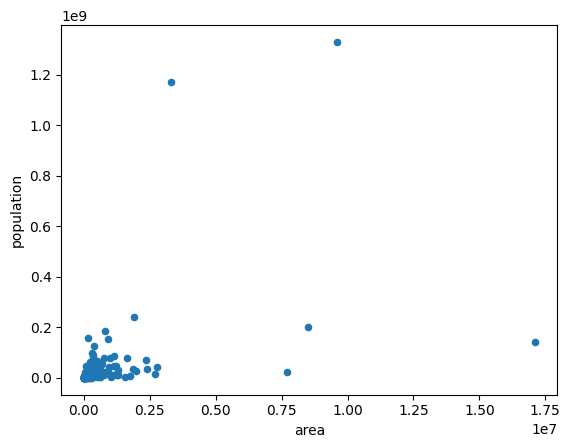

In [77]:
SUBDF1.plot(kind="scatter",x="area", y="population") 

### 15) Agregar una nueva caracteristica al dataframe SUBDF1 cuyo nombre sea RELACION y sea el resultado de dividir POPULATION/AREA

In [86]:
SUBDF1["RELACION"]=SUBDF1["population"] / SUBDF1["area"]


### 16) Visualizar las 10 primeras observaciones de SUBDF1 y verificar que existe la nueva columna que acabamos de agregar

In [80]:
SUBDF1.head(10)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,numeric,phone,population,tld,RELACION
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,AN,3041565,ca,Andorra,20,376,84000,.ad,179.487179
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,784,971,4975593,.ae,60.033699
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,4,93,29121286,.af,44.974959
5,AL,ALB,28748.0,Tirana,EU,ALL,Lek,AL,783754,"sq,el",Albania,8,355,2986952,.al,103.901211
6,AM,ARM,29800.0,Yerevan,AS,AMD,Dram,AM,174982,hy,Armenia,51,374,2968000,.am,99.597315
7,AO,AGO,1246700.0,Luanda,AF,AOA,Kwanza,AO,3351879,pt-AO,Angola,24,244,13068161,.ao,10.482202
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,32,54,41343201,.ar,14.942119
10,AS,ASM,199.0,Pago Pago,OC,USD,Dollar,AQ,5880801,"en-AS,sm,to",American Samoa,16,+1-684,57881,.as,290.859296
11,AT,AUT,83858.0,Vienna,EU,EUR,Euro,AU,2782113,"de-AT,hr,hu,sl",Austria,40,43,8205000,.at,97.843974
12,AU,AUS,7686850.0,Canberra,OC,AUD,Dollar,AS,2077456,en-AU,Australia,36,61,21515754,.au,2.799034


### EJECUTAR LAS SIGUIENTES CELDAS

In [81]:
#EJECUTE ESTE CODIGO PARA VER CUANTOS VALORES ÚNICOS HAY EN LA CARACTERISTICA CONTINENT DE 
SUBDF1["continent"].unique()
#array(['EU', 'AS',  'AF',  'SA', 'OC'], dtype=object)

array(['EU', 'AS', 'AF', 'SA', 'OC'], dtype=object)

In [82]:
#EJECUTE ESTE CODIGO PARA CREAR UN DATAFRAME CON EL CODIGO Y NOMBRE DE CADA UNO DE LOS CON
Continent=['EU', 'AS',  'AF',  'SA', 'OC']
Nombre=['EUROPA', 'ASIA', 'AFRICA', 'SUDAMERICA', 'OCEANIA' ]
dataC=pd.DataFrame(
	{'Continent': Continent,
	'Nombre': Nombre}
)
dataC.head()

,Continent,Nombre
0,EU,EUROPA
1,AS,ASIA
2,AF,AFRICA
3,SA,SUDAMERICA
4,OC,OCEANIA


### 17) Hacer un JOIN de tipo INNER entre los dataframes SUBDF1 y DATAC y determine de que forma se podrian relacionar los mismos

In [83]:
#Se pueden relacionar por continent
dataj=pd.merge(left=SUBDF1, right=dataC,how="inner", left_on="continent", right_on="Continent")

### 18) Visualizar las 15 primeras observaciones de DATAJ y verificar que podemos observar ahora el nombre del continente

In [84]:
dataj.head(15)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,numeric,phone,population,tld,RELACION,Continent,Nombre
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,AN,3041565,ca,Andorra,20,376,84000,.ad,179.487179,EU,EUROPA
1,AL,ALB,28748.0,Tirana,EU,ALL,Lek,AL,783754,"sq,el",Albania,8,355,2986952,.al,103.901211,EU,EUROPA
2,AT,AUT,83858.0,Vienna,EU,EUR,Euro,AU,2782113,"de-AT,hr,hu,sl",Austria,40,43,8205000,.at,97.843974,EU,EUROPA
3,BA,BIH,51129.0,Sarajevo,EU,BAM,Marka,BK,3277605,"bs,hr-BA,sr-BA",Bosnia and Herzegovina,70,387,4590000,.ba,89.772927,EU,EUROPA
4,BE,BEL,30510.0,Brussels,EU,EUR,Euro,BE,2802361,"nl-BE,fr-BE,de-BE",Belgium,56,32,10403000,.be,340.970174,EU,EUROPA
5,BG,BGR,110910.0,Sofia,EU,BGN,Lev,BU,732800,"bg,tr-BG,rom",Bulgaria,100,359,7148785,.bg,64.455730,EU,EUROPA
6,BY,BLR,207600.0,Minsk,EU,BYR,Ruble,BO,630336,"be,ru",Belarus,112,375,9685000,.by,46.652216,EU,EUROPA
7,CH,CHE,41290.0,Bern,EU,CHF,Franc,SZ,2658434,"de-CH,fr-CH,it-CH,rm",Switzerland,756,41,7581000,.ch,183.603778,EU,EUROPA
8,CY,CYP,9250.0,Nicosia,EU,EUR,Euro,CY,146669,"el-CY,tr-CY,en",Cyprus,196,357,1102677,.cy,119.208324,EU,EUROPA
9,CZ,CZE,78866.0,Prague,EU,CZK,Koruna,EZ,3077311,"cs,sk",Czechia,203,420,10476000,.cz,132.832906,EU,EUROPA


### 19) Visualizar las 15 ultimas observaciones de DATAJ y verificar que podemos observar ahora el nombre del continente

In [85]:
dataj.tail(15)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,numeric,phone,population,tld,RELACION,Continent,Nombre
184,NF,NFK,34.6,Kingston,OC,AUD,Dollar,NF,2155115,en-NF,Norfolk Island,574,672,1828,.nf,52.832370,OC,OCEANIA
185,NR,NRU,21.0,Yaren,OC,AUD,Dollar,NR,2110425,"na,en-NR",Nauru,520,674,10065,.nr,479.285714,OC,OCEANIA
186,NU,NIU,260.0,Alofi,OC,NZD,Dollar,NE,4036232,"niu,en-NU",Niue,570,683,2166,.nu,8.330769,OC,OCEANIA
187,NZ,NZL,268680.0,Wellington,OC,NZD,Dollar,NZ,2186224,"en-NZ,mi",New Zealand,554,64,4252277,.nz,15.826548,OC,OCEANIA
188,PF,PYF,4167.0,Papeete,OC,XPF,Franc,FP,4030656,"fr-PF,ty",French Polynesia,258,689,270485,.pf,64.911207,OC,OCEANIA
189,PG,PNG,462840.0,Port Moresby,OC,PGK,Kina,PP,2088628,"en-PG,ho,meu,tpi",Papua New Guinea,598,675,6064515,.pg,13.102833,OC,OCEANIA
190,PN,PCN,47.0,Adamstown,OC,NZD,Dollar,PC,4030699,en-PN,Pitcairn,612,870,46,.pn,0.978723,OC,OCEANIA
191,PW,PLW,458.0,Melekeok,OC,USD,Dollar,PS,1559582,"pau,sov,en-PW,tox,ja,fil,zh",Palau,585,680,19907,.pw,43.465066,OC,OCEANIA
192,SB,SLB,28450.0,Honiara,OC,SBD,Dollar,BP,2103350,"en-SB,tpi",Solomon Islands,90,677,559198,.sb,19.655466,OC,OCEANIA
193,TL,TLS,15007.0,Dili,OC,USD,Dollar,TT,1966436,"tet,pt-TL,id,en",East Timor,626,670,1154625,.tl,76.939095,OC,OCEANIA
